# Data Preparation - LMA Features Data

## Imports

In [103]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from collections import Counter
import numpy as np

### Load Dataset

In [61]:
data = pd.read_csv('lma_features/LMA_DATA.csv')

In [62]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175,angry
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057,angry
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173,angry
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941,angry
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854,angry


## Data Balancing

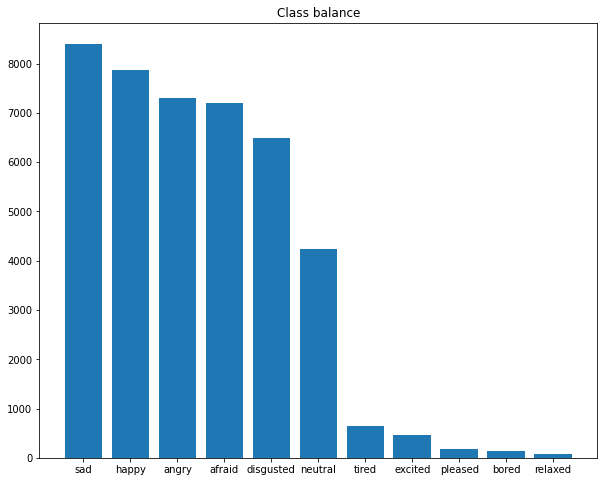

Minority class: 84
Majority class: 7296
Proportion: 0.01 : 1.0


In [46]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(10,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=angry, n=7296 (16.952%)
Class=happy, n=7876 (18.300%)
Class=sad, n=8406 (19.531%)
Class=disgusted, n=6491 (15.082%)
Class=afraid, n=7209 (16.750%)
Class=neutral, n=4237 (9.845%)
Class=pleased, n=184 (0.428%)
Class=bored, n=142 (0.330%)
Class=tired, n=654 (1.520%)
Class=relaxed, n=84 (0.195%)
Class=excited, n=460 (1.069%)


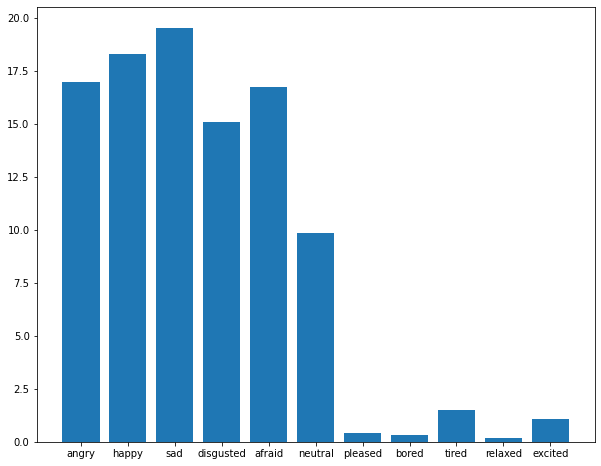

In [51]:
df = pd.read_csv('lma_features/LMA_DATA.csv')
values = df.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=2000 (4.647%)
Class=angry, n=2000 (4.647%)
Class=bored, n=142 (0.330%)
Class=disgusted, n=2000 (4.647%)
Class=excited, n=460 (1.069%)
Class=happy, n=2000 (4.647%)
Class=neutral, n=2000 (4.647%)
Class=pleased, n=184 (0.428%)
Class=relaxed, n=84 (0.195%)
Class=sad, n=2000 (4.647%)
Class=tired, n=654 (1.520%)


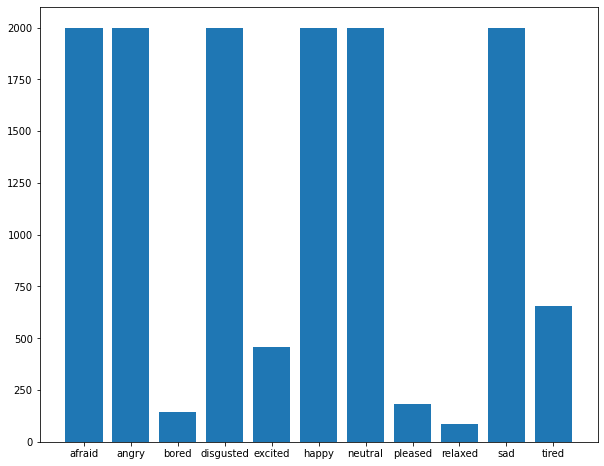

In [54]:
strategy = {"angry":2000, "happy": 2000, "sad": 2000, "disgusted": 2000, "afraid": 2000, "neutral": 2000, "pleased": 184, "bored": 142, "tired": 654, "relaxed": 84, "excited": 460}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=2000 (9.091%)
Class=angry, n=2000 (9.091%)
Class=bored, n=2000 (9.091%)
Class=disgusted, n=2000 (9.091%)
Class=excited, n=2000 (9.091%)
Class=happy, n=2000 (9.091%)
Class=neutral, n=2000 (9.091%)
Class=pleased, n=2000 (9.091%)
Class=relaxed, n=2000 (9.091%)
Class=sad, n=2000 (9.091%)
Class=tired, n=2000 (9.091%)


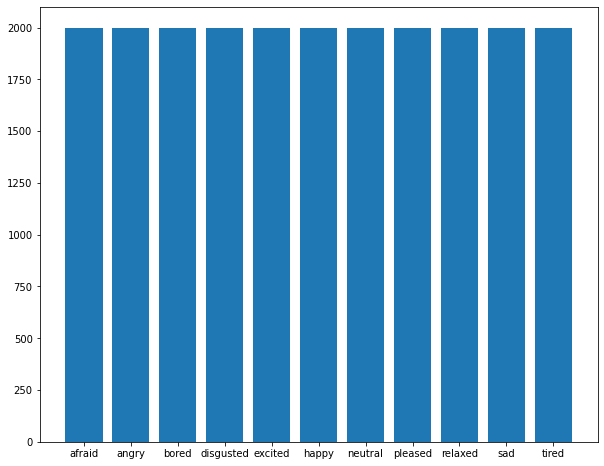

In [55]:
strategy = {"angry":2000, "happy": 2000, "sad": 2000, "disgusted": 2000, "afraid": 2000, "neutral": 2000, "pleased": 2000, "bored": 2000, "tired": 2000, "relaxed": 2000, "excited": 2000}

# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [56]:
data = pd.read_csv('lma_features/LMA_DATA.csv')

with open('datasets/LMA_BALANCED.csv', 'w', newline='') as balanced_data:
    writer = csv.writer(balanced_data, delimiter=',')
    
    #Add header
    writer.writerow(data.columns)
    index = 0
    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            new_row.append(X[i][j])
        new_row.append(y[i])
                    
        writer.writerow(new_row)

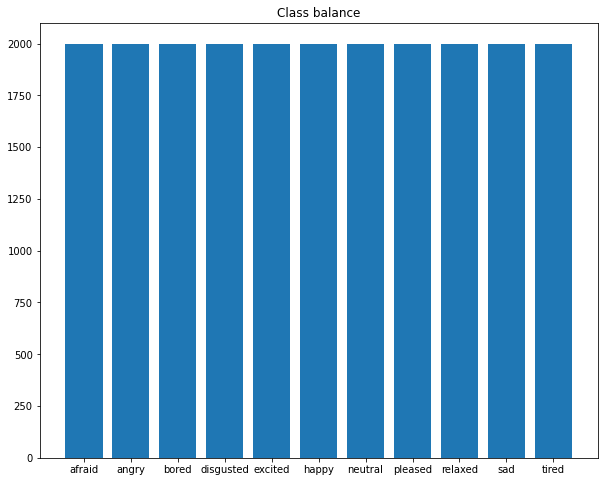

Minority class: 2000
Majority class: 2000
Proportion: 1.0 : 1.0


In [57]:
data = pd.read_csv('datasets/LMA_BALANCED.csv')

target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(10,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

## Data Normalization

In [77]:
data = pd.read_csv('datasets/LMA_BALANCED.csv')

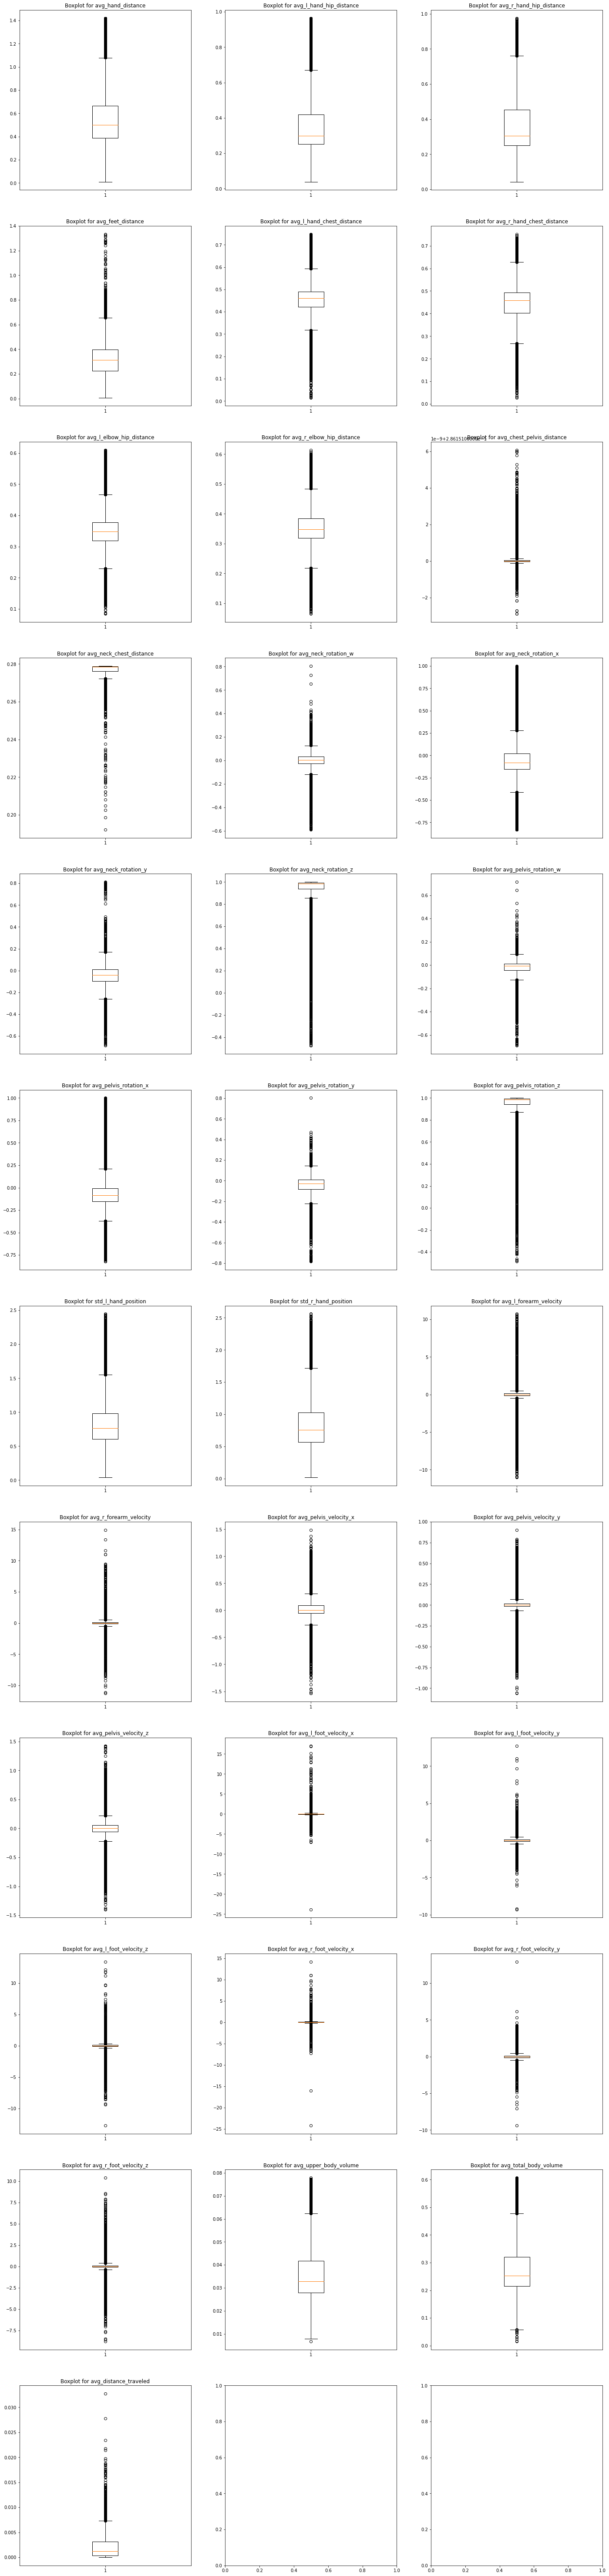

In [78]:
numeric_vars = data.select_dtypes(include='number').columns

rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [79]:
numeric_data = data.select_dtypes(include='number')

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,...,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000
mean,0.396532,0.352009,0.352042,0.239262,0.601325,0.584934,0.519648,0.532030,0.333585,0.975219,...,0.494340,0.583537,0.422173,0.485971,0.630131,0.421140,0.457430,0.424268,0.451886,0.062855
std,0.211531,0.187226,0.189343,0.106575,0.154638,0.159681,0.160422,0.160503,0.055761,0.046041,...,0.074397,0.017972,0.031013,0.043597,0.017152,0.029682,0.059897,0.194902,0.184846,0.069455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266911,0.229609,0.221102,0.164582,0.554183,0.518802,0.445497,0.461519,0.318844,0.968430,...,0.476532,0.581948,0.415963,0.483410,0.629037,0.415336,0.453740,0.298104,0.337586,0.009954
50%,0.348411,0.281641,0.280069,0.230805,0.608181,0.595541,0.502410,0.516506,0.321616,0.994613,...,0.495310,0.583226,0.421991,0.486237,0.630299,0.420593,0.457863,0.367114,0.401316,0.037431
75%,0.463525,0.411208,0.441197,0.294664,0.648329,0.643215,0.558833,0.582877,0.326660,0.998926,...,0.515560,0.584578,0.426769,0.490298,0.631798,0.425845,0.463512,0.491956,0.514814,0.095789
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


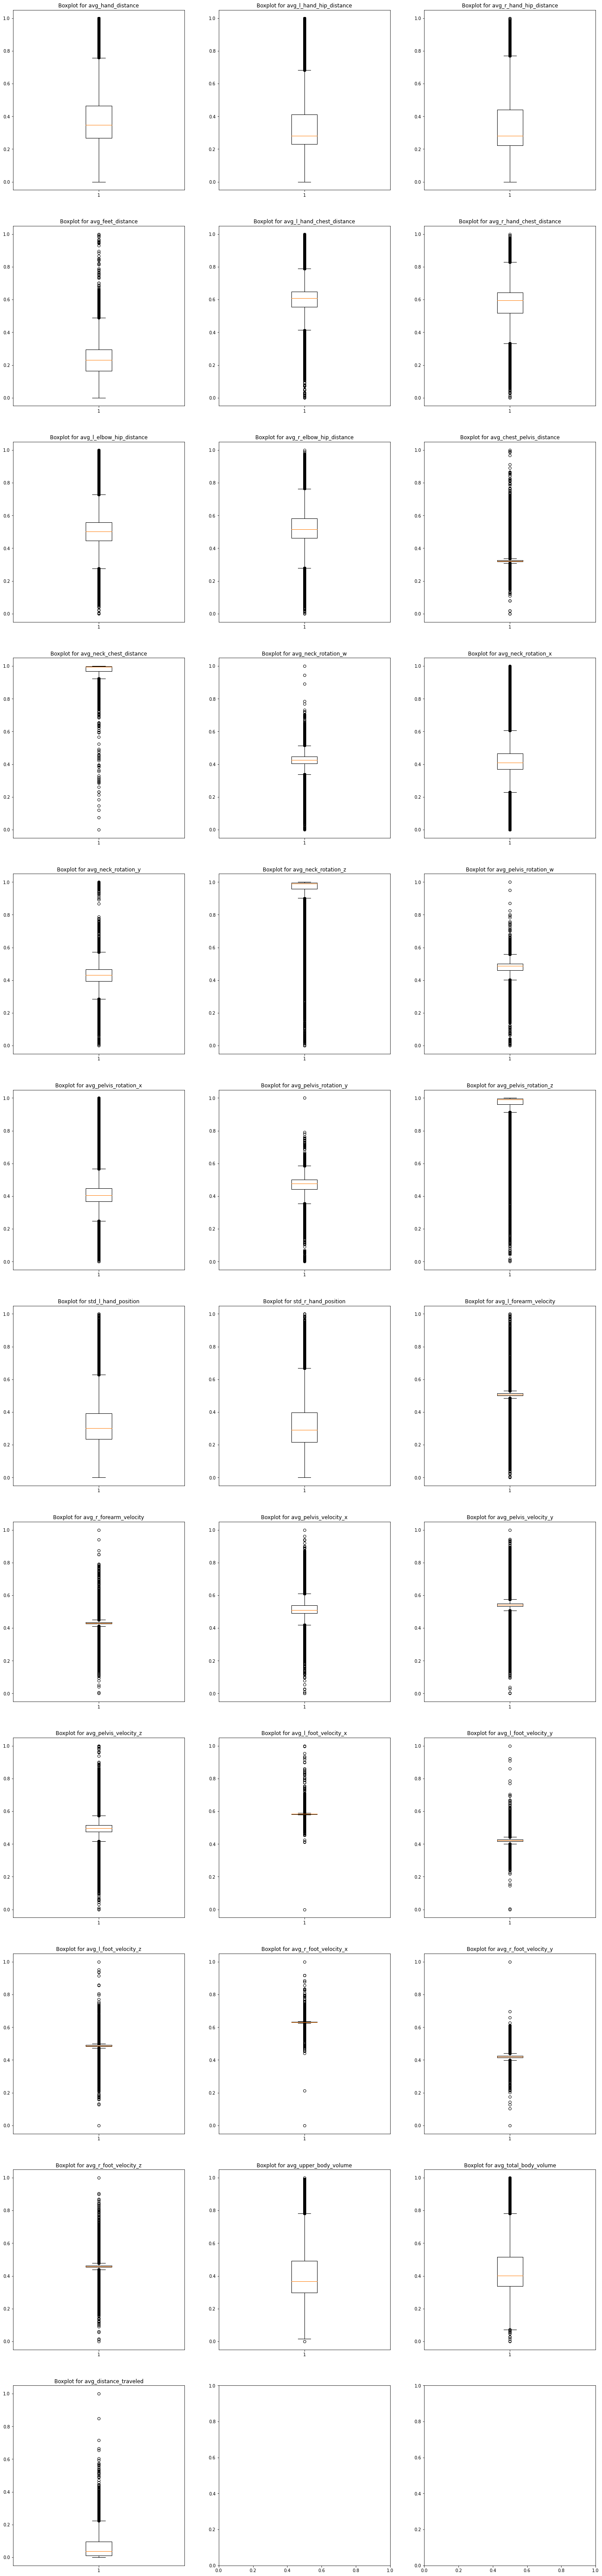

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,0.980730,0.828346,0.818457,0.181177,0.956531,0.944587,0.944043,0.932497,0.320856,0.998260,...,0.495284,0.583226,0.421994,0.486220,0.630330,0.420508,0.458319,0.972471,0.979735,0.001726
1,0.980658,0.828219,0.818718,0.181577,0.956411,0.944738,0.943883,0.932679,0.321584,0.998455,...,0.495912,0.583226,0.422003,0.486216,0.630004,0.420373,0.458242,0.972450,0.979554,0.001375
2,0.958989,0.769690,0.789661,0.286839,0.919515,0.934874,0.896142,0.923311,0.321468,0.996480,...,0.495445,0.583249,0.421679,0.486362,0.630384,0.420388,0.458176,0.948332,0.954725,0.000992
3,0.979853,0.825206,0.817478,0.181525,0.954879,0.944070,0.941941,0.931875,0.321196,0.998538,...,0.495760,0.583183,0.421898,0.486383,0.630282,0.420978,0.458476,0.971468,0.978532,0.000988
4,0.959227,0.769592,0.790414,0.286788,0.919852,0.934975,0.896600,0.923366,0.321328,0.995639,...,0.495548,0.583269,0.421394,0.486172,0.630666,0.419911,0.457917,0.948381,0.954898,0.001547


In [80]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [82]:
#Store MinMaxScaler
target = data.select_dtypes(include='object')

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/BN_LMA_DATA.csv', index = False)

## Feature Selection

In [83]:
data = pd.read_csv('datasets/BN_LMA_DATA.csv')

In [85]:
y = data.pop('EMOTION')
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,0.980730,0.828346,0.818457,0.181177,0.956531,0.944587,0.944043,0.932497,0.320856,0.998260,...,0.495284,0.583226,0.421994,0.486220,0.630330,0.420508,0.458319,0.972471,0.979735,0.001726
1,0.980658,0.828219,0.818718,0.181577,0.956411,0.944738,0.943883,0.932679,0.321584,0.998455,...,0.495912,0.583226,0.422003,0.486216,0.630004,0.420373,0.458242,0.972450,0.979554,0.001375
2,0.958989,0.769690,0.789661,0.286839,0.919515,0.934874,0.896142,0.923311,0.321468,0.996480,...,0.495445,0.583249,0.421679,0.486362,0.630384,0.420388,0.458176,0.948332,0.954725,0.000992
3,0.979853,0.825206,0.817478,0.181525,0.954879,0.944070,0.941941,0.931875,0.321196,0.998538,...,0.495760,0.583183,0.421898,0.486383,0.630282,0.420978,0.458476,0.971468,0.978532,0.000988
4,0.959227,0.769592,0.790414,0.286788,0.919852,0.934975,0.896600,0.923366,0.321328,0.995639,...,0.495548,0.583269,0.421394,0.486172,0.630666,0.419911,0.457917,0.948381,0.954898,0.001547


### Variance Analysis

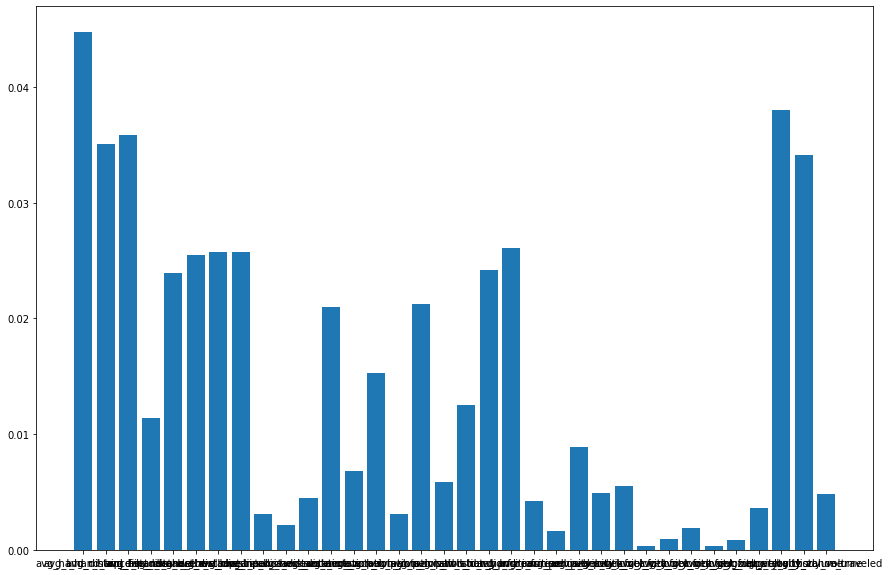

avg_hand_distance  -  0.04474516331851887
avg_l_hand_hip_distance  -  0.035053509163655544
avg_r_hand_hip_distance  -  0.03585091859706352
avg_feet_distance  -  0.011358139777244716
avg_l_hand_chest_distance  -  0.023913062753662617
avg_r_hand_chest_distance  -  0.02549811602996773
avg_l_elbow_hip_distance  -  0.025735184489745
avg_r_elbow_hip_distance  -  0.025761336977537755
avg_chest_pelvis_distance  -  0.003109302441833093
avg_neck_chest_distance  -  0.0021198050538566915
avg_neck_rotation_w  -  0.004520363175011759
avg_neck_rotation_x  -  0.02098401344936062
avg_neck_rotation_y  -  0.00680919589365518
avg_neck_rotation_z  -  0.015269139241846327
avg_pelvis_rotation_w  -  0.00308016670935448
avg_pelvis_rotation_x  -  0.021212863477250005
avg_pelvis_rotation_y  -  0.005841524450802365
avg_pelvis_rotation_z  -  0.012532489507832477
std_l_hand_position  -  0.024155101793896967
std_r_hand_position  -  0.026095603375073426
avg_l_forearm_velocity  -  0.004201928945728808
avg_r_forearm_ve

In [89]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

## Remove highly correlated features

In [123]:
data = pd.read_csv('datasets/BN_LMA_DATA.csv')

In [124]:
y = data.pop('EMOTION')
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,0.980730,0.828346,0.818457,0.181177,0.956531,0.944587,0.944043,0.932497,0.320856,0.998260,...,0.495284,0.583226,0.421994,0.486220,0.630330,0.420508,0.458319,0.972471,0.979735,0.001726
1,0.980658,0.828219,0.818718,0.181577,0.956411,0.944738,0.943883,0.932679,0.321584,0.998455,...,0.495912,0.583226,0.422003,0.486216,0.630004,0.420373,0.458242,0.972450,0.979554,0.001375
2,0.958989,0.769690,0.789661,0.286839,0.919515,0.934874,0.896142,0.923311,0.321468,0.996480,...,0.495445,0.583249,0.421679,0.486362,0.630384,0.420388,0.458176,0.948332,0.954725,0.000992
3,0.979853,0.825206,0.817478,0.181525,0.954879,0.944070,0.941941,0.931875,0.321196,0.998538,...,0.495760,0.583183,0.421898,0.486383,0.630282,0.420978,0.458476,0.971468,0.978532,0.000988
4,0.959227,0.769592,0.790414,0.286788,0.919852,0.934975,0.896600,0.923366,0.321328,0.995639,...,0.495548,0.583269,0.421394,0.486172,0.630666,0.419911,0.457917,0.948381,0.954898,0.001547


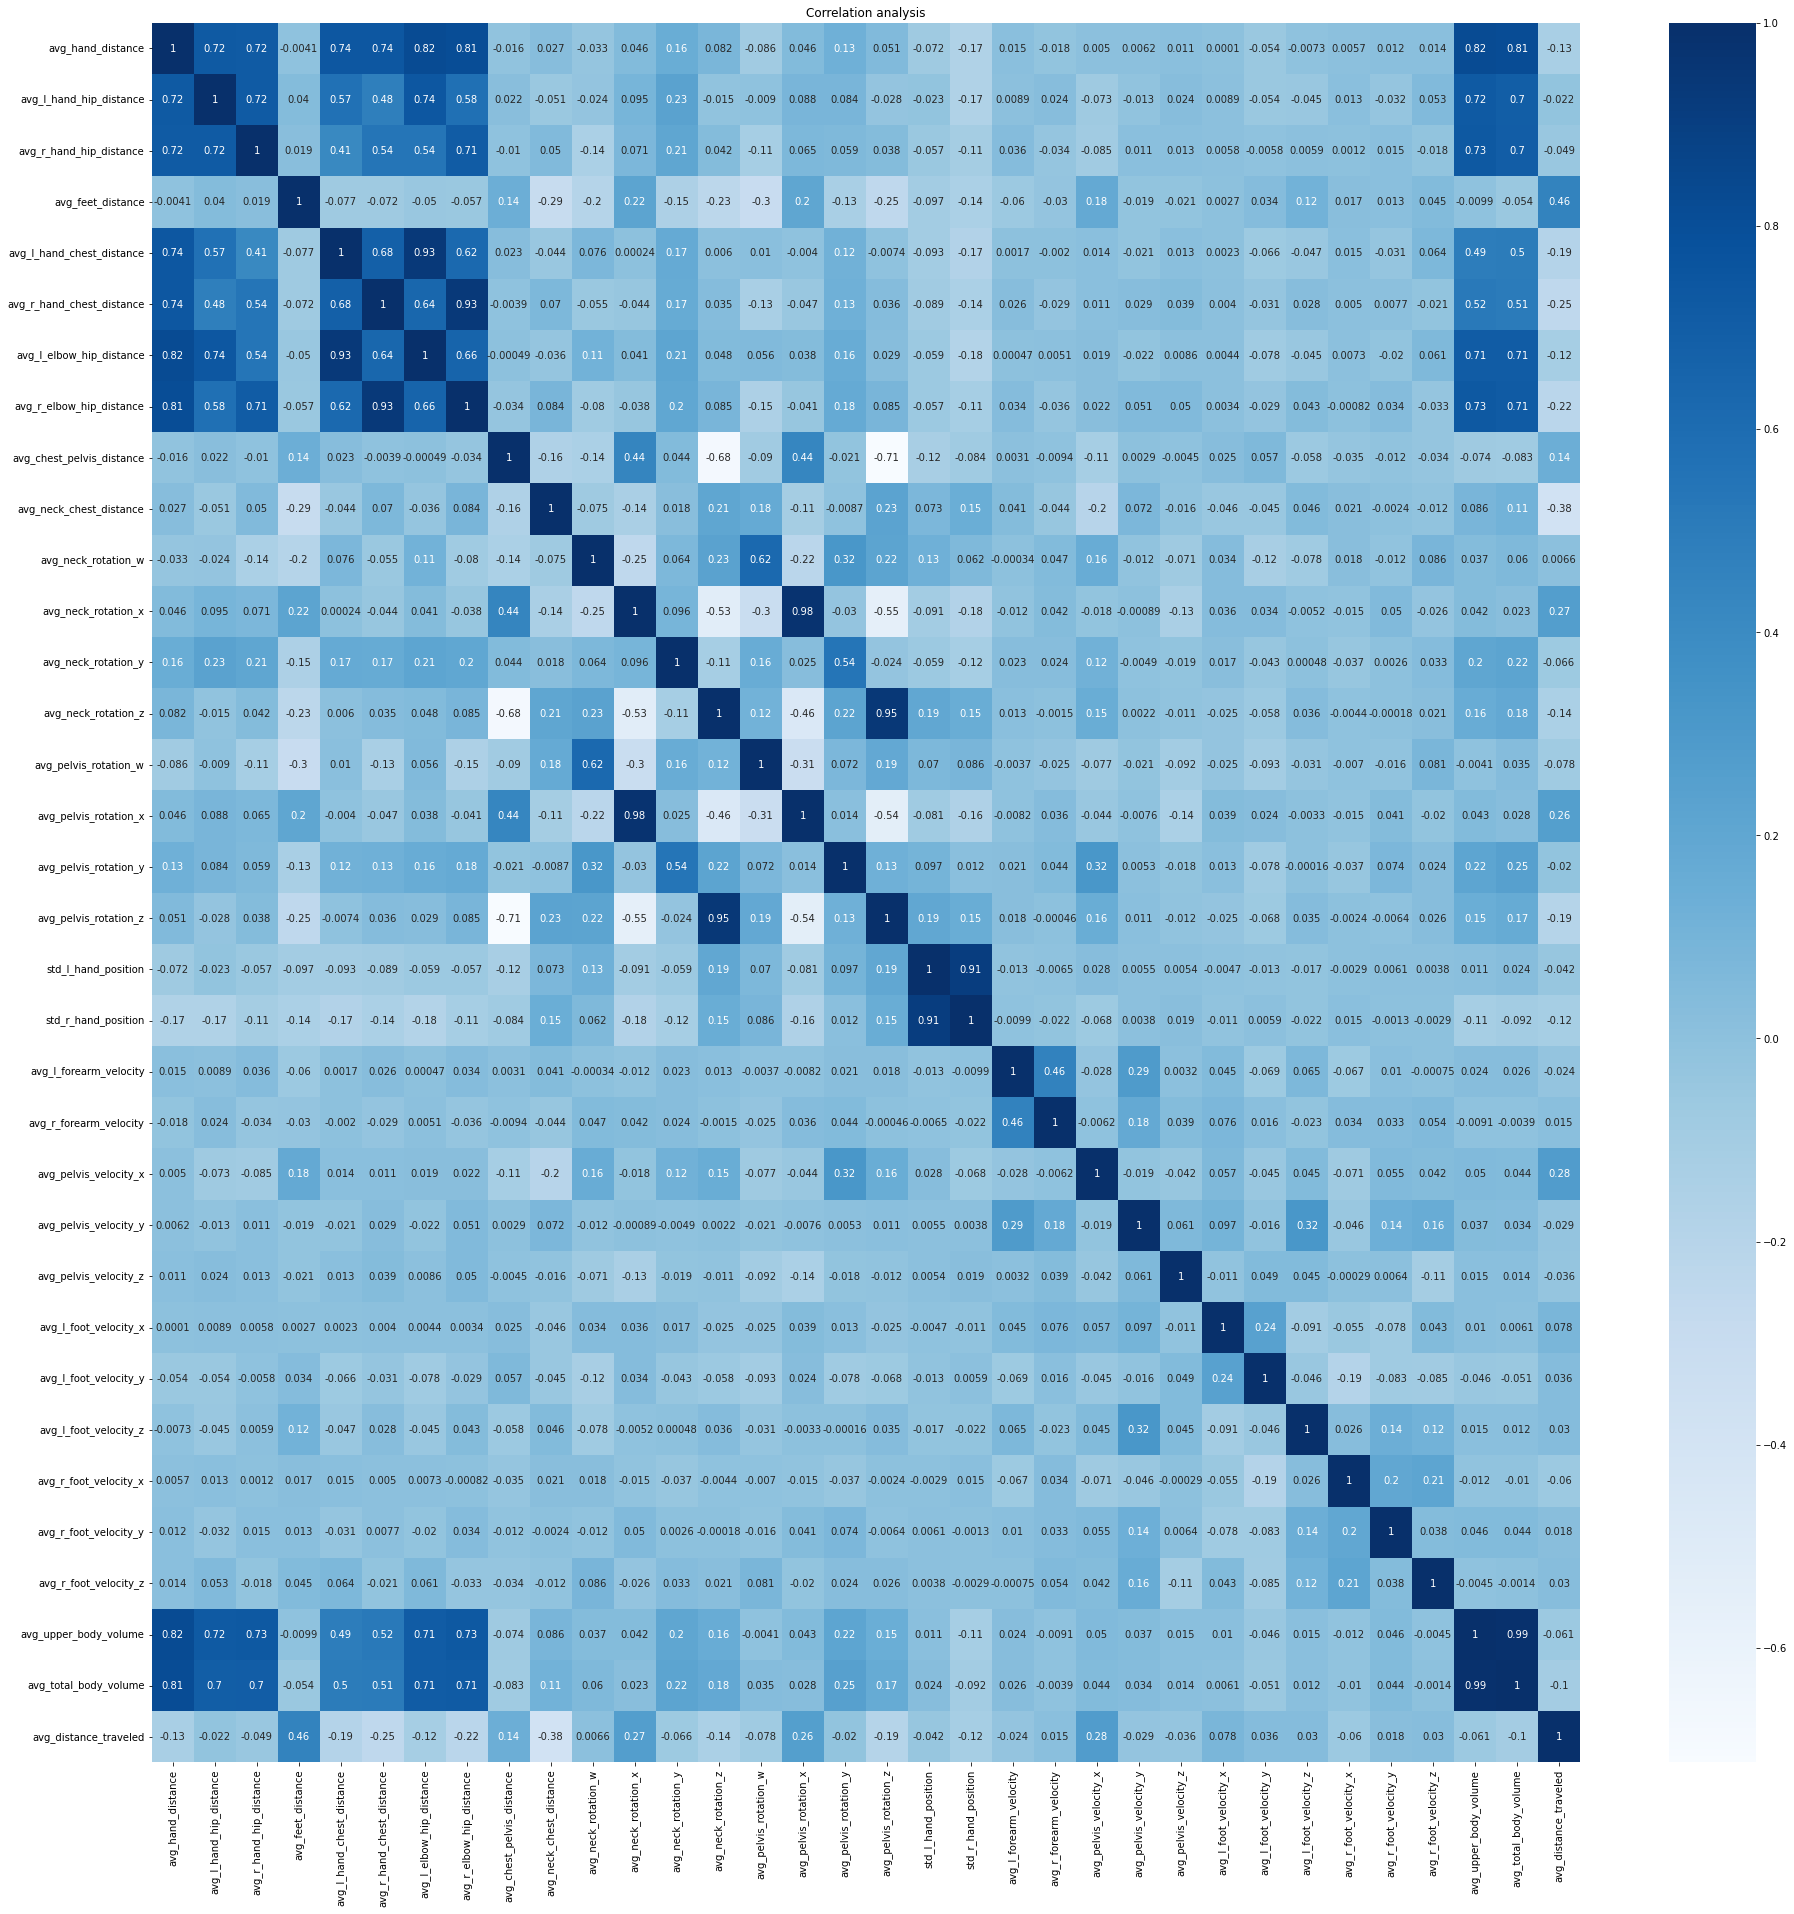

In [125]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [126]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['avg_pelvis_rotation_x', 'avg_total_body_volume']


In [130]:
X = X.drop(columns=['avg_total_body_volume'])

In [131]:
#Store

fullData = X.join(y, how='right')
fullData.to_csv(r'datasets/BNFs_LMA_DATA.csv', index = False)

In [132]:
data = pd.read_csv('datasets/BNFs_LMA_DATA.csv')
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION
0,0.980730,0.828346,0.818457,0.181177,0.956531,0.944587,0.944043,0.932497,0.320856,0.998260,...,0.495284,0.583226,0.421994,0.486220,0.630330,0.420508,0.458319,0.972471,0.001726,afraid
1,0.980658,0.828219,0.818718,0.181577,0.956411,0.944738,0.943883,0.932679,0.321584,0.998455,...,0.495912,0.583226,0.422003,0.486216,0.630004,0.420373,0.458242,0.972450,0.001375,afraid
2,0.958989,0.769690,0.789661,0.286839,0.919515,0.934874,0.896142,0.923311,0.321468,0.996480,...,0.495445,0.583249,0.421679,0.486362,0.630384,0.420388,0.458176,0.948332,0.000992,afraid
3,0.979853,0.825206,0.817478,0.181525,0.954879,0.944070,0.941941,0.931875,0.321196,0.998538,...,0.495760,0.583183,0.421898,0.486383,0.630282,0.420978,0.458476,0.971468,0.000988,afraid
4,0.959227,0.769592,0.790414,0.286788,0.919852,0.934975,0.896600,0.923366,0.321328,0.995639,...,0.495548,0.583269,0.421394,0.486172,0.630666,0.419911,0.457917,0.948381,0.001547,afraid
